In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR100
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split,ConcatDataset

import ResNet
import data
import CNN

Files already downloaded and verified


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
net = ResNet.resnet18(num_classes=20).to(device)


In [4]:
trainDataLoader, testDataLoader =  data.loadData_byBigClass(250)

In [5]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.00005)  

In [6]:
def evaluate(model,dataloader):
  acc = 0.0
  rights = 0
  wrongs = 0
  for i, test_examples in enumerate(dataloader, 0):
    #predicting using the nets
    inputs, labels = test_examples
    predicted_outputs = model(inputs.to(device))
    #Selecting the label which has the largest outputs
    outputs = torch.argmax(predicted_outputs, 1)

    #Counting successfully and unsuccessfully predicted cases
    for j, n in enumerate(outputs):
      if n == labels[j]:
        rights += 1
      else:
        wrongs += 1
  #calculate accuracy with the cases we recorded
  acc = rights/(rights+wrongs)
  #return the accuracy
  return acc


In [7]:
def train(model,train,test,loss_fn,optimizer,watch_iter):
    total_iter = 0
    loss = 0.0

    while total_iter < 10000:
        for batch in train:
            total_iter += 1
            train_inputs, train_labels = batch
            train_outputs = model(train_inputs.to(device))
            l = loss_fn(train_outputs, train_labels.to(device))
            loss += l.item()
            optimizer.zero_grad()
            l.backward()
            optimizer.step()

            if total_iter % watch_iter == 0:
                train_loss = loss / watch_iter
                train_loss_his.append(train_loss)
                loss = 0.0
                for batch in test:
                    test_inputs, test_labels = batch
                    test_outputs = model(test_inputs.to(device))
                    l = loss_fn(test_outputs, test_labels.to(device))
                    loss += l.item()
                test_loss_his.append(loss)
                txt = f'iter: {total_iter: 6d}, train loss: {train_loss}, test_loss: {loss}'
                print(txt)
                print('accuracy: ' + str(evaluate(model,test)*100) + '%')
                loss = 0.0
    return

In [8]:
train_loss_his = []
test_loss_his = []
train(net,trainDataLoader,testDataLoader,loss,optimizer,100)


iter:    100, train loss: 2.621851532459259, test_loss: 95.14311790466309
accuracy: 26.39%
iter:    200, train loss: 2.3073856449127197, test_loss: 87.75987243652344
accuracy: 32.42%
iter:    300, train loss: 2.0578551900386812, test_loss: 83.41309905052185
accuracy: 35.77%
iter:    400, train loss: 2.0129746901988983, test_loss: 79.87465155124664
accuracy: 38.37%
iter:    500, train loss: 1.715674819946289, test_loss: 79.62790775299072
accuracy: 38.58%
iter:    600, train loss: 1.7512425768375397, test_loss: 75.36860775947571
accuracy: 41.53%
iter:    700, train loss: 1.3629087674617768, test_loss: 79.93123650550842
accuracy: 40.339999999999996%
iter:    800, train loss: 1.4583944582939148, test_loss: 76.67298865318298
accuracy: 42.18%
iter:    900, train loss: 0.9334121507406234, test_loss: 86.98202252388
accuracy: 40.0%
iter:   1000, train loss: 1.105704442858696, test_loss: 85.23181772232056
accuracy: 41.05%
iter:   1100, train loss: 0.5292895424365998, test_loss: 97.38959789276123

accuracy: 42.59%
iter:   8600, train loss: 0.002441620062745642, test_loss: 157.26413345336914
accuracy: 42.83%
iter:   8700, train loss: 0.004808437628089451, test_loss: 158.05755162239075
accuracy: 42.449999999999996%
iter:   8800, train loss: 0.0054579408938298, test_loss: 161.46186017990112
accuracy: 41.589999999999996%
iter:   8900, train loss: 0.005320369535475038, test_loss: 164.04929161071777
accuracy: 41.03%
iter:   9000, train loss: 0.019608132508583367, test_loss: 168.1377556324005
accuracy: 40.56%
iter:   9100, train loss: 0.2400561016984284, test_loss: 147.2476761341095
accuracy: 37.31%
iter:   9200, train loss: 0.33554224655032155, test_loss: 132.37785363197327
accuracy: 40.36%
iter:   9300, train loss: 0.11574291542172432, test_loss: 141.28355979919434
accuracy: 41.15%
iter:   9400, train loss: 0.0955114545300603, test_loss: 144.14436221122742
accuracy: 41.099999999999994%
iter:   9500, train loss: 0.04271406695246696, test_loss: 144.1965959072113
accuracy: 41.9800000000

In [9]:
class_2 = 	[['beaver', 'dolphin', 'otter', 'seal', 'whale'],
	['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
	['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
    ['bottle', 'bowl', 'can', 'cup', 'plate'],
	['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
	['clock', 'keyboard', 'lamp', 'telephone', 'television'],
    ['bed', 'chair', 'couch', 'table', 'wardrobe'],
	['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
	['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    ['bridge', 'castle', 'house', 'road', 'skyscraper'],
	['cloud', 'forest', 'mountain', 'plain', 'sea'],
	['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
	['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
	['crab', 'lobster', 'snail', 'spider', 'worm'],
	['baby', 'boy', 'girl', 'man', 'woman'],
	['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
	['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
	['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
	['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
	['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']]

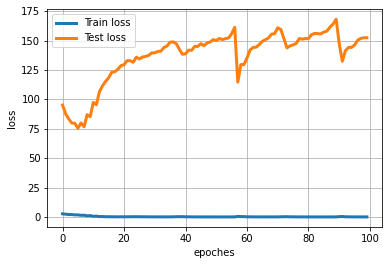

In [10]:
plt.plot(range(len(train_loss_his)),train_loss_his,'-',linewidth=3,label='Train loss')
plt.plot(range(len(train_loss_his)),test_loss_his,'-',linewidth=3,label='Test loss')
plt.xlabel('epoches')
plt.ylabel('loss')
plt.grid(True)
plt.legend()